In [1]:
from scipy import misc
import numpy as np
import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch
import cv2

# [selectivesearch](https://github.com/AlpacaDB/selectivesearch)

In [2]:
img = misc.imread('moving_obj.png')
# img = cv2.imread('moving_obj.png')

In [3]:
def decode_segmap(temp, plot=False):
    Sky = [128, 128, 128]
    Building = [128, 0, 0]
    Pole = [192, 192, 128]
    # Road_marking
    Road_marking = [255, 69, 0]
    Road = [128, 64, 128]
    Pavement = [60, 40, 222]
    Tree = [128, 128, 0]
    SignSymbol = [192, 128, 128]
    Fence = [64, 64, 128]
    Car = [64, 0, 128]
    Pedestrian = [64, 64, 0]
    Bicyclist = [0, 128, 192]
    Unlabelled = [0, 0, 0]

    label_colours = np.array([Sky, Building, Pole, Road, Pavement, Tree, 
                              SignSymbol, Road_marking, Car, 
                              Pedestrian, Fence, Unlabelled])

    height, width = temp.shape
    rgb = np.zeros((height, width, 3), dtype=np.uint8)
    
    for row in range(height):
        for col in range(width):
            label = temp[row, col]
            color = label_colours[label]
#             if label==0:
#                 print('label:', 0)
            rgb[row, col, :] = color
            
#     rgb = rgb/255.0
    
    if plot:
        plt.imshow(rgb)
        plt.show()
    else:
        return rgb

In [4]:
img = decode_segmap(img)

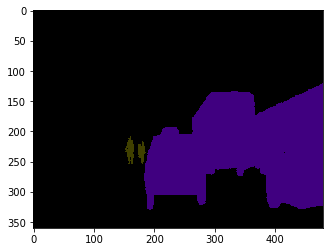

In [5]:
plt.imshow(img)

In [6]:
height, width = img.shape[:2]

In [7]:
height

360

In [8]:
width

480

In [9]:
# img_r = img[:, :, 0::3]
# img_g = img[:, :, 1::3]
# img_b = img[:, :, 2::3]

In [10]:
# np.unique(img_r)

In [11]:
# np.unique(img_g)

In [12]:
# np.unique(img_b)

In [13]:
# for row in range(height):
#     for col in range(width):
#         if np.array_equal(img[row, col, :], [64, 0, 128]):
# #             print('汽车 Car = [64, 0, 128]')
#             pass
#         elif np.array_equal(img[row, col, :], [64, 64, 0]):
# #             print('行人 Pedestrian = [64, 64, 0]')
#             pass
#         elif np.array_equal(img[row, col, :], [0, 128, 192]):
# #             print('自行车手 Bicyclist = [0, 128, 192]')
#             pass
#         elif np.array_equal(img[row, col, :], [192, 128, 192]):
# #             print('自行车手 Bicyclist = [192, 128, 192]')
#             pass
#         else:
#             img[row, col, :] = [0, 0, 0]

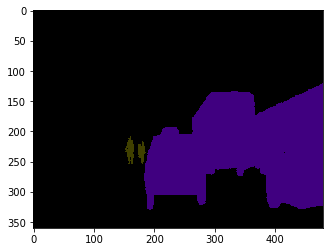

In [14]:
plt.imshow(img)

In [15]:
img_lbl, regions = selectivesearch.selective_search(img, scale=500, sigma=0.9, min_size=10)

In [16]:
candidates = set()
for r in regions:
    if r['rect'] in candidates:
        pass
        continue
    if r['size'] < 2000:
        pass
        continue
    x, y, w, h = r['rect']
    if h==0 or w==0:
        continue
    elif w / h > 1.2 or h / w > 1.2:
        pass
#         continue
    candidates.add(r['rect'])

In [17]:
len(candidates)

5

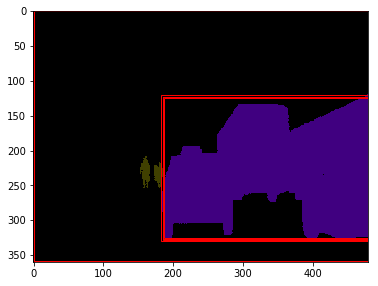

In [18]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img)
for x, y, w, h in candidates:
    rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)
plt.show()